Dataset shape: (105375, 12)
Missing values per column:
 article_id          0
source_id       80880
source_name         0
author           8219
title              40
description       383
url                 0
url_to_image     5624
published_at        0
content             0
category           42
full_content    46943
dtype: int64

Data types:
 article_id       int64
source_id       object
source_name     object
author          object
title           object
description     object
url             object
url_to_image    object
published_at    object
content         object
category        object
full_content    object
dtype: object
Missing values = 0
Training size: 84266
Testing size: 21067
Accuracy: 0.3121
F1 Score: 0.3031
Accuracy: 31.21%


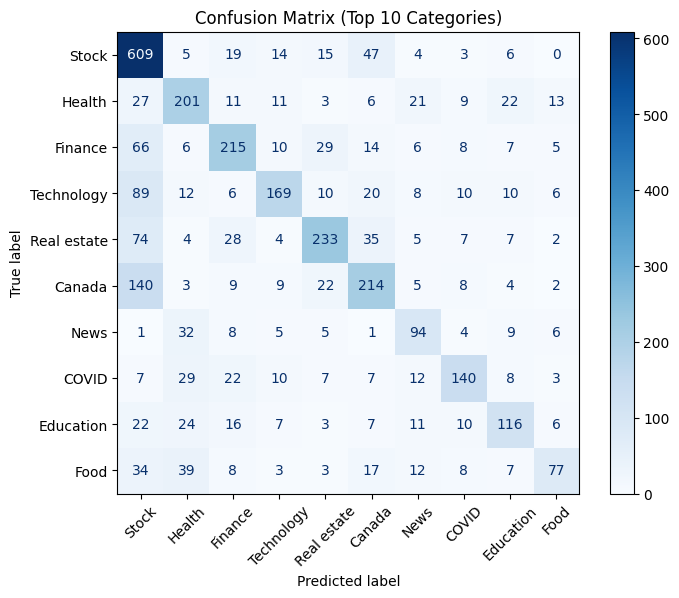

C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                       precision    recall  f1-score   support

                          Afghanistan       0.52      0.26      0.35        53
                               Africa       0.41      0.22      0.28       199
                              Albania       0.50      0.10      0.16        21
                              Algeria       0.00      0.00      0.00        33
                               Amazon       0.38      0.57      0.46       166
                              America       0.37      0.26      0.30       227
                              Andorra       0.00      0.00      0.00         4
                               Angola       0.00      0.00      0.00        14
                                Anime       0.85      0.35      0.49        49
                           Antarctica       0.67      0.38      0.48        53
                         Architecture       0.30      0.23      0.26       162
                            Argentina       0.28   

C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 2: Load dataset
# Replace with your actual path
df = pd.read_csv("Global_News_Dataset.csv")

print("Dataset shape:", df.shape)
df.head()

# Step 3: Inspect missing values and datatypes
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Step 4: Fix missing values

# Drop rows with missing category (label)
df = df.dropna(subset=["category"])

# Fill missing author with "unknown"
df["author"] = df["author"].fillna("unknown")

# Fill source_id using source_name as fallback
df["source_id"] = df["source_id"].fillna(df["source_name"])
df["source_id"] = df["source_id"].fillna("unknown")

# Fill missing url_to_image with "no_image"
df["url_to_image"] = df["url_to_image"].fillna("no_image")

# Ensure only string columns are cleaned
text_columns = ["author", "title", "description", "content", "full_content"]

for col in text_columns:
    df[col] = df[col].astype(str).str.strip().replace("", "unknown")

# Create clean content column (lowercase text)
df["content_clean"] = df["content"].astype(str).str.lower()

# Step 5: Verify all missing values are fixed
missing_total = df.isnull().sum().sum()
print("Missing values =", missing_total)

# Step 6: Split into training and testing sets
X = df["content_clean"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Testing size:", X_test.shape[0])

# Step 7: Convert text into numeric features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 8: Train Logistic Regression model
model = LogisticRegression(max_iter=200, n_jobs=-1)
model.fit(X_train_vec, y_train)

# Step 9: Evaluate model
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 10: Accuracy in percentage
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

# Step 11: Confusion Matrix for Top 10 categories (for readability)
top_classes = y_train.value_counts().nlargest(10).index
mask = y_test.isin(top_classes)

cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Top 10 Categories)")
plt.show()

# Step 12: Detailed classification report
print(classification_report(y_test, y_pred))

In [1]:
pip install lime

Note: you may need to restart the kernel to use updated packages.Collecting lime
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.9 MB 6.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.9 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.9 MB 6.5 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.9 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.9 MB 6.3 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 6


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas matplotlib scikit-learn lime


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!python -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


In [6]:
!python -c "import lime; print('LIME version:', __import__('lime').__version__)"


Traceback (most recent call last):
  File "<string>", line 1, in <module>
AttributeError: module 'lime' has no attribute '__version__'


In [7]:
!pip show lime


Name: lime
Version: 0.2.0.1
Summary: Local Interpretable Model-Agnostic Explanations for machine learning classifiers
Home-page: http://github.com/marcotcr/lime
Author: Marco Tulio Ribeiro
Author-email: marcotcr@gmail.com
License: BSD
Location: C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: matplotlib, numpy, scikit-image, scikit-learn, scipy, tqdm
Required-by: 


In [8]:
from lime.lime_text import LimeTextExplainer


In [ ]:
# ============================================================
# CELL 2: LIME EXPLAINABILITY ANALYSIS
# ============================================================

# Import LIME
from lime.lime_text import LimeTextExplainer

print("\n" + "="*60)
print("LIME EXPLAINABILITY ANALYSIS")
print("="*60)

# Step 1: Initialize LIME Explainer
class_names = pipeline.classes_
explainer = LimeTextExplainer(class_names=class_names)

print(f"\nInitialized LIME explainer for {len(class_names)} categories")

# Step 2: Function to explain predictions (FIXED)
def explain_prediction(idx, num_features=10, save_html=True):
    """
    Explain a specific prediction using LIME
    
    Parameters:
    -----------
    idx : int
        Index of the test sample to explain
    num_features : int
        Number of top words to show in explanation
    save_html : bool
        Whether to save HTML explanation file
    """
    # Get the text and true label
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    predicted_label = pipeline.predict([text])[0]
    
    print(f"\n{'='*60}")
    print(f"EXPLANATION FOR TEST SAMPLE #{idx}")
    print(f"{'='*60}")
    print(f"\nTrue Category: {true_label}")
    print(f"Predicted Category: {predicted_label}")
    print(f"\nArticle Text (first 300 chars):")
    print(f"{text[:300]}...")
    
    # Generate explanation
    print(f"\nGenerating LIME explanation...")
    exp = explainer.explain_instance(
        text, 
        pipeline.predict_proba, 
        num_features=num_features,
        top_labels=3
    )
    
    # Show explanation in console
    print(f"\nTop {num_features} words influencing the prediction:")
    print("-" * 60)
    
    for label in exp.available_labels()[:3]:
        category = class_names[label]
        print(f"\n{str(category).upper()}:")  # FIXED: Convert to string
        word_weights = exp.as_list(label=label)
        for word, weight in word_weights:
            direction = "POSITIVE" if weight > 0 else "NEGATIVE"
            print(f"  {word:20s} | {weight:+.4f} | {direction}")
    
    # Get prediction probabilities
    probs = pipeline.predict_proba([text])[0]
    print(f"\nPrediction Probabilities (Top 5):")
    print("-" * 60)
    top_indices = np.argsort(probs)[-5:][::-1]
    for i in top_indices:
        category_name = str(class_names[i])  # FIXED: Convert to string first
        print(f"{category_name:20s} | {probs[i]:.4f} ({probs[i]*100:.2f}%)")
    
    # Save HTML visualization
    if save_html:
        html_file = f"lime_explanation_sample_{idx}.html"
        exp.save_to_file(html_file)
        print(f"\nHTML explanation saved to: {html_file}")
    
    return exp

# Step 3: Explain multiple predictions
print("\n" + "="*60)
print("GENERATING EXPLANATIONS FOR SAMPLE PREDICTIONS")
print("="*60)

# Explain 3 random test samples
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=3, replace=False)

explanations = []
for idx in sample_indices:
    exp = explain_prediction(idx, num_features=10, save_html=True)
    explanations.append(exp)
    print("\n" + "="*60 + "\n")

# Step 4: Explain misclassifications
print("\n" + "="*60)
print("EXPLAINING MISCLASSIFICATIONS")
print("="*60)

def explain_misclassifications(num_samples=3):
    """Explain predictions that were incorrect"""
    misclassified_mask = y_test != y_pred
    misclassified_indices = np.where(misclassified_mask)[0]
    
    print(f"\nTotal misclassifications: {len(misclassified_indices)}")
    print(f"Explaining {min(num_samples, len(misclassified_indices))} examples...")
    
    if len(misclassified_indices) == 0:
        print("No misclassifications found!")
        return
    
    sample_size = min(num_samples, len(misclassified_indices))
    selected = np.random.choice(misclassified_indices, size=sample_size, replace=False)
    
    for idx in selected:
        explain_prediction(idx, num_features=10, save_html=True)
        print("\n" + "-"*60 + "\n")

explain_misclassifications(num_samples=3)

# Step 5: Summary
print("\n" + "="*60)
print("EXPLAINABILITY SUMMARY")
print("="*60)
print(f"\nTotal test samples: {len(X_test)}")
print(f"Correctly classified: {(y_test == y_pred).sum()}")
print(f"Misclassified: {(y_test != y_pred).sum()}")
print(f"\nLIME explanations generated for sample predictions")
print(f"HTML files saved in current directory")
print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)


In [ ]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    LogisticRegression(max_iter=200, n_jobs=-1)
)
pipeline.fit(X_train, y_train)


Dataset shape: (105375, 12)
   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...  

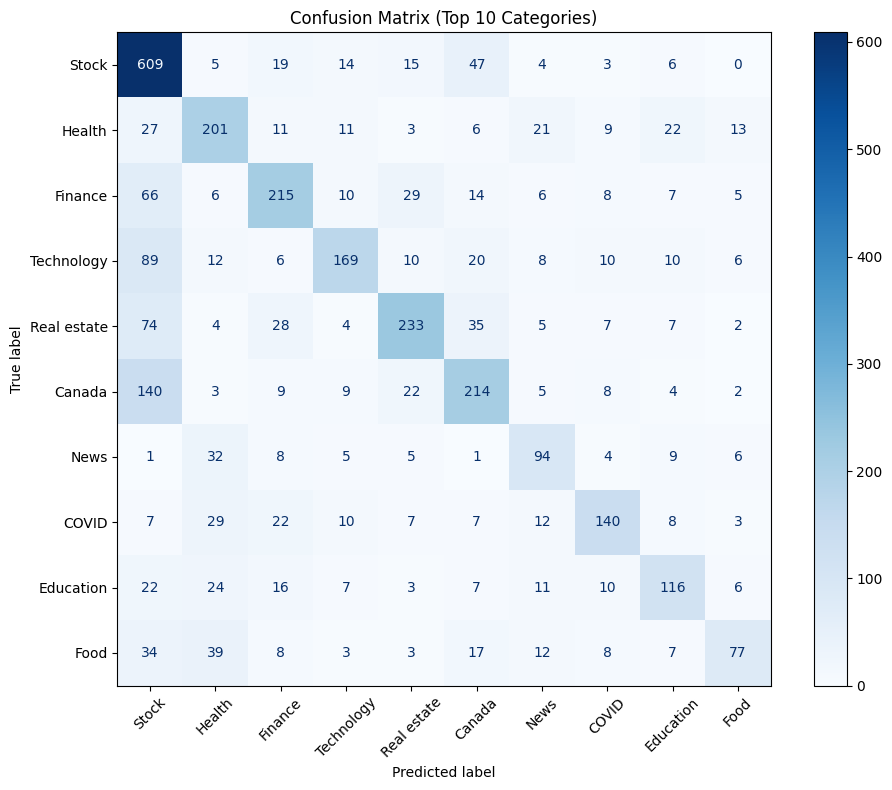


Confusion matrix saved as 'confusion_matrix.png'

CLASSIFICATION REPORT


C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                                       precision    recall  f1-score   support

                          Afghanistan       0.52      0.26      0.35        53
                               Africa       0.41      0.22      0.28       199
                              Albania       0.50      0.10      0.16        21
                              Algeria       0.00      0.00      0.00        33
                               Amazon       0.38      0.57      0.46       166
                              America       0.37      0.26      0.30       227
                              Andorra       0.00      0.00      0.00         4
                               Angola       0.00      0.00      0.00        14
                                Anime       0.85      0.35      0.49        49
                           Antarctica       0.67      0.38      0.48        53
                         Architecture       0.30      0.23      0.26       162
                            Argentina       0.28   

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [10]:
# ============================================================
# NEWS CLASSIFICATION WITH LIME EXPLAINABILITY
# ============================================================

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
import numpy as np

# NEW: Import LIME for explainability
from lime.lime_text import LimeTextExplainer

# Step 2: Load dataset
df = pd.read_csv("Global_News_Dataset.csv")

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Inspect missing values and datatypes
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Step 4: Data Cleaning
df = df.dropna(subset=["category"])
df["author"] = df["author"].fillna("unknown")
df["source_id"] = df["source_id"].fillna(df["source_name"])
df["source_id"] = df["source_id"].fillna("unknown")
df["url_to_image"] = df["url_to_image"].fillna("no_image")

text_columns = ["author", "title", "description", "content", "full_content"]
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().replace("", "unknown")

df["content_clean"] = df["content"].astype(str).str.lower()

missing_total = df.isnull().sum().sum()
print(f"\nMissing values after cleaning: {missing_total}")

# Step 5: Train-Test Split
X = df["content_clean"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining size: {X_train.shape}")
print(f"Testing size: {X_test.shape}")

# Step 6: Build Pipeline (Vectorizer + Model)
vectorizer = TfidfVectorizer(max_features=5000)
model = LogisticRegression(max_iter=200, n_jobs=-1)

# Create pipeline - makes LIME integration easier
pipeline = make_pipeline(vectorizer, model)

# Step 7: Train the model
print("\nTraining model...")
pipeline.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1 Score: {f1:.4f}")

# Step 9: Confusion Matrix
top_classes = y_train.value_counts().nlargest(10).index
mask = y_test.isin(top_classes)

cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Top 10 Categories)")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion matrix saved as 'confusion_matrix.png'")

# Step 10: Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred))

# ============================================================
# LIME INTEGRATION FOR EXPLAINABILITY
# ============================================================

print("\n" + "="*60)
print("LIME EXPLAINABILITY ANALYSIS")
print("="*60)

# Step 11: Initialize LIME Explainer
class_names = pipeline.classes_
explainer = LimeTextExplainer(class_names=class_names)

print(f"\nInitialized LIME explainer for {len(class_names)} categories")

# Step 12: Function to explain predictions
def explain_prediction(idx, num_features=10, save_html=True):
    """
    Explain a specific prediction using LIME
    
    Parameters:
    -----------
    idx : int
        Index of the test sample to explain
    num_features : int
        Number of top words to show in explanation
    save_html : bool
        Whether to save HTML explanation file
    """
    # Get the text and true label
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    predicted_label = pipeline.predict([text])
    
    print(f"\n{'='*60}")
    print(f"EXPLANATION FOR TEST SAMPLE #{idx}")
    print(f"{'='*60}")
    print(f"\nTrue Category: {true_label}")
    print(f"Predicted Category: {predicted_label}")
    print(f"\nArticle Text (first 300 chars):")
    print(f"{text[:300]}...")
    
    # Generate explanation
    print(f"\nGenerating LIME explanation...")
    exp = explainer.explain_instance(
        text, 
        pipeline.predict_proba, 
        num_features=num_features,
        top_labels=3
    )
    
    # Show explanation in console
    print(f"\nTop {num_features} words influencing the prediction:")
    print("-" * 60)
    
    for label in exp.available_labels()[:3]:
        category = class_names[label]
        print(f"\n{category.upper()}:")
        word_weights = exp.as_list(label=label)
        for word, weight in word_weights:
            direction = "POSITIVE" if weight > 0 else "NEGATIVE"
            print(f"  {word:20s} | {weight:+.4f} | {direction}")
    
    # Get prediction probabilities
    probs = pipeline.predict_proba([text])
    print(f"\nPrediction Probabilities (Top 5):")
    print("-" * 60)
    top_indices = np.argsort(probs)[-5:][::-1]
    for i in top_indices:
        print(f"{class_names[i]:20s} | {probs[i]:.4f} ({probs[i]*100:.2f}%)")
    
    # Save HTML visualization
    if save_html:
        html_file = f"lime_explanation_sample_{idx}.html"
        exp.save_to_file(html_file)
        print(f"\nHTML explanation saved to: {html_file}")
    
    return exp

# Step 13: Explain multiple predictions
print("\n" + "="*60)
print("GENERATING EXPLANATIONS FOR SAMPLE PREDICTIONS")
print("="*60)

# Explain 3 random test samples
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=3, replace=False)

explanations = []
for idx in sample_indices:
    exp = explain_prediction(idx, num_features=10, save_html=True)
    explanations.append(exp)
    print("\n" + "="*60 + "\n")

# Step 14: Explain misclassifications
print("\n" + "="*60)
print("EXPLAINING MISCLASSIFICATIONS")
print("="*60)

def explain_misclassifications(num_samples=3):
    """Explain predictions that were incorrect"""
    misclassified_mask = y_test != y_pred
    misclassified_indices = np.where(misclassified_mask)
    
    print(f"\nTotal misclassifications: {len(misclassified_indices)}")
    print(f"Explaining {min(num_samples, len(misclassified_indices))} examples...")
    
    if len(misclassified_indices) == 0:
        print("No misclassifications found!")
        return
    
    sample_size = min(num_samples, len(misclassified_indices))
    selected = np.random.choice(misclassified_indices, size=sample_size, replace=False)
    
    for idx in selected:
        explain_prediction(idx, num_features=10, save_html=True)
        print("\n" + "-"*60 + "\n")

explain_misclassifications(num_samples=3)

# Step 15: Summary
print("\n" + "="*60)
print("EXPLAINABILITY SUMMARY")
print("="*60)
print(f"\nTotal test samples: {len(X_test)}")
print(f"Correctly classified: {(y_test == y_pred).sum()}")
print(f"Misclassified: {(y_test != y_pred).sum()}")
print(f"\nLIME explanations generated for sample predictions")
print(f"HTML files saved in current directory")
print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)


In [ ]:
# ============================================================
# NEWS CLASSIFICATION MODEL TRAINING
# ============================================================

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
import numpy as np

# Step 2: Load dataset
df = pd.read_csv("Global_News_Dataset.csv")

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Inspect missing values and datatypes
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Step 4: Data Cleaning
df = df.dropna(subset=["category"])
df["author"] = df["author"].fillna("unknown")
df["source_id"] = df["source_id"].fillna(df["source_name"])
df["source_id"] = df["source_id"].fillna("unknown")
df["url_to_image"] = df["url_to_image"].fillna("no_image")

text_columns = ["author", "title", "description", "content", "full_content"]
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().replace("", "unknown")

df["content_clean"] = df["content"].astype(str).str.lower()

missing_total = df.isnull().sum().sum()
print(f"\nMissing values after cleaning: {missing_total}")

# Step 5: Train-Test Split
X = df["content_clean"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

# Step 6: Build Pipeline (Vectorizer + Model)
vectorizer = TfidfVectorizer(max_features=5000)
model = LogisticRegression(max_iter=200, n_jobs=-1)

# Create pipeline
pipeline = make_pipeline(vectorizer, model)

# Step 7: Train the model
print("\nTraining model...")
pipeline.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1 Score: {f1:.4f}")

# Step 9: Confusion Matrix (Top 10 categories)
top_classes = y_train.value_counts().nlargest(10).index
mask = y_test.isin(top_classes)

cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Top 10 Categories)")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion matrix saved as 'confusion_matrix.png'")

# Step 10: Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred))

print("\n" + "="*60)
print("MODEL TRAINING COMPLETE!")
print("="*60)
